![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from pathlib import Path

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


# Inspecting the applications
The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but this blog gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [61]:
cc_apps_nans_replaced = cc_apps.replace("?", np.NaN)
cc_apps_nans_replaced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [62]:
cc_apps_imputed = cc_apps_nans_replaced.copy()

In [63]:
for col in cc_apps_imputed.columns:
    # Check if the column is of object type
    if cc_apps_imputed[col].dtypes == "object":
        # Impute with the most frequent value
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(
            cc_apps_imputed[col].value_counts().index[0]
        )
    else:
        cc_apps_imputed[col] = cc_apps_imputed[col].fillna(cc_apps_imputed[col].mean())

In [64]:
cc_apps_encoded = pd.get_dummies(cc_apps_imputed, drop_first=True)

In [65]:
X = cc_apps_encoded.iloc[:, :-1].values
y = cc_apps_encoded.iloc[:, [-1]].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

# Use logreg to predict instances from the training set
y_train_pred = logreg.predict(rescaledX_train)

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_train, y_train_pred))

[[203   1]
 [  1 257]]


In [66]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_train_score, best_train_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_train_score, best_train_params))

Best: 0.818163 using {'max_iter': 100, 'tol': 0.01}


## Class balance Numeric distributions

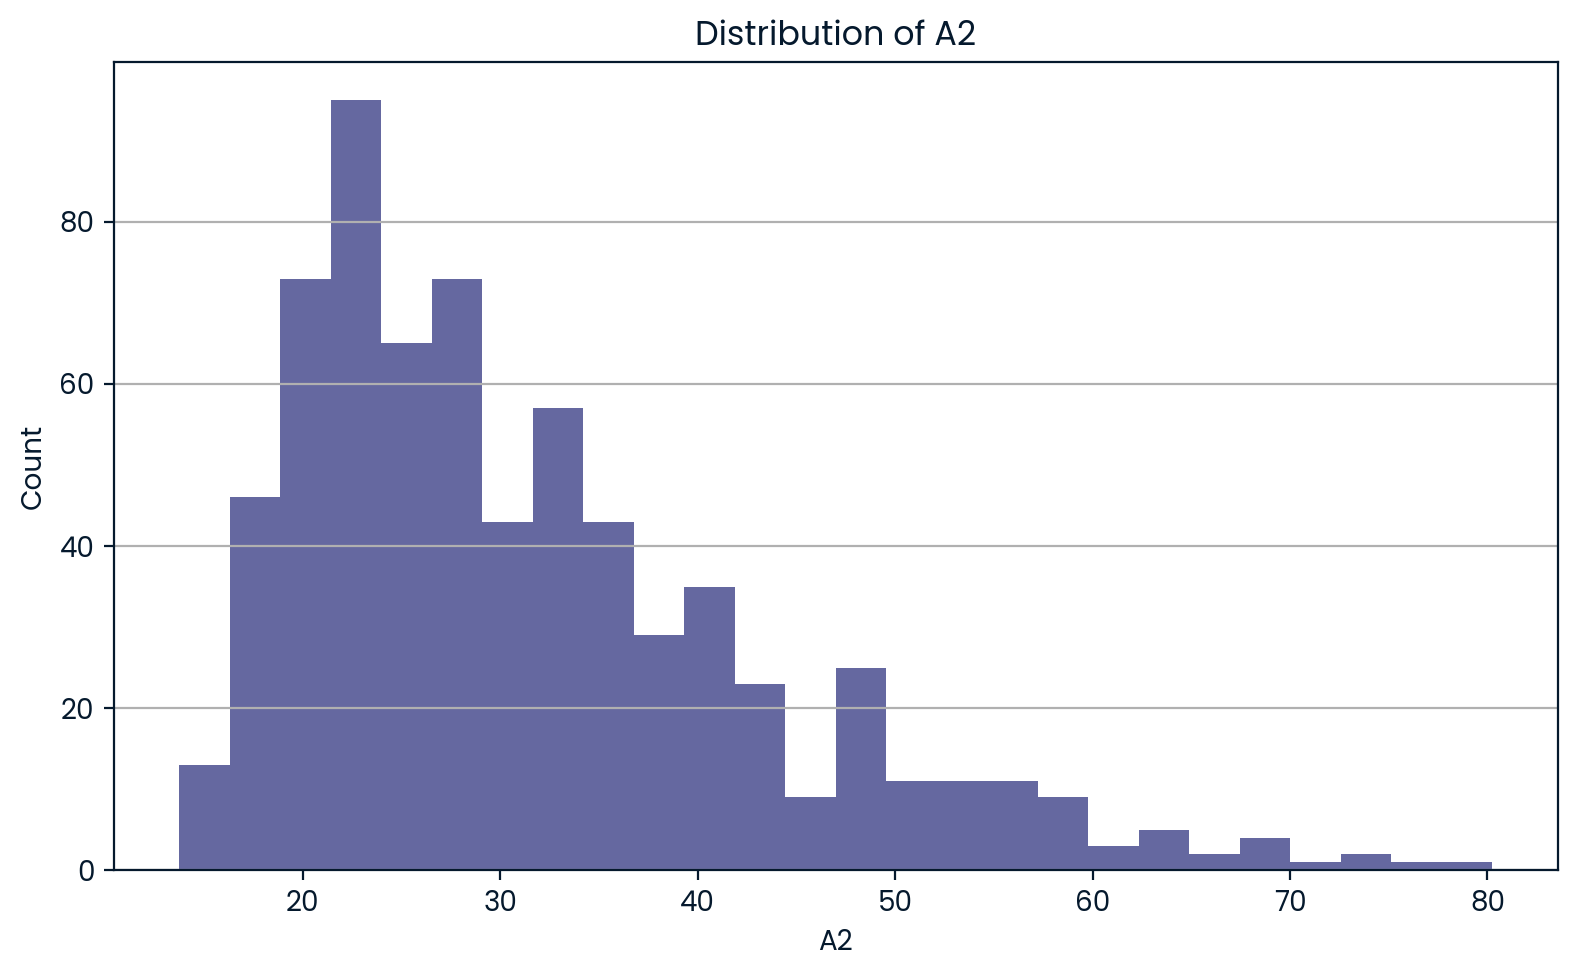

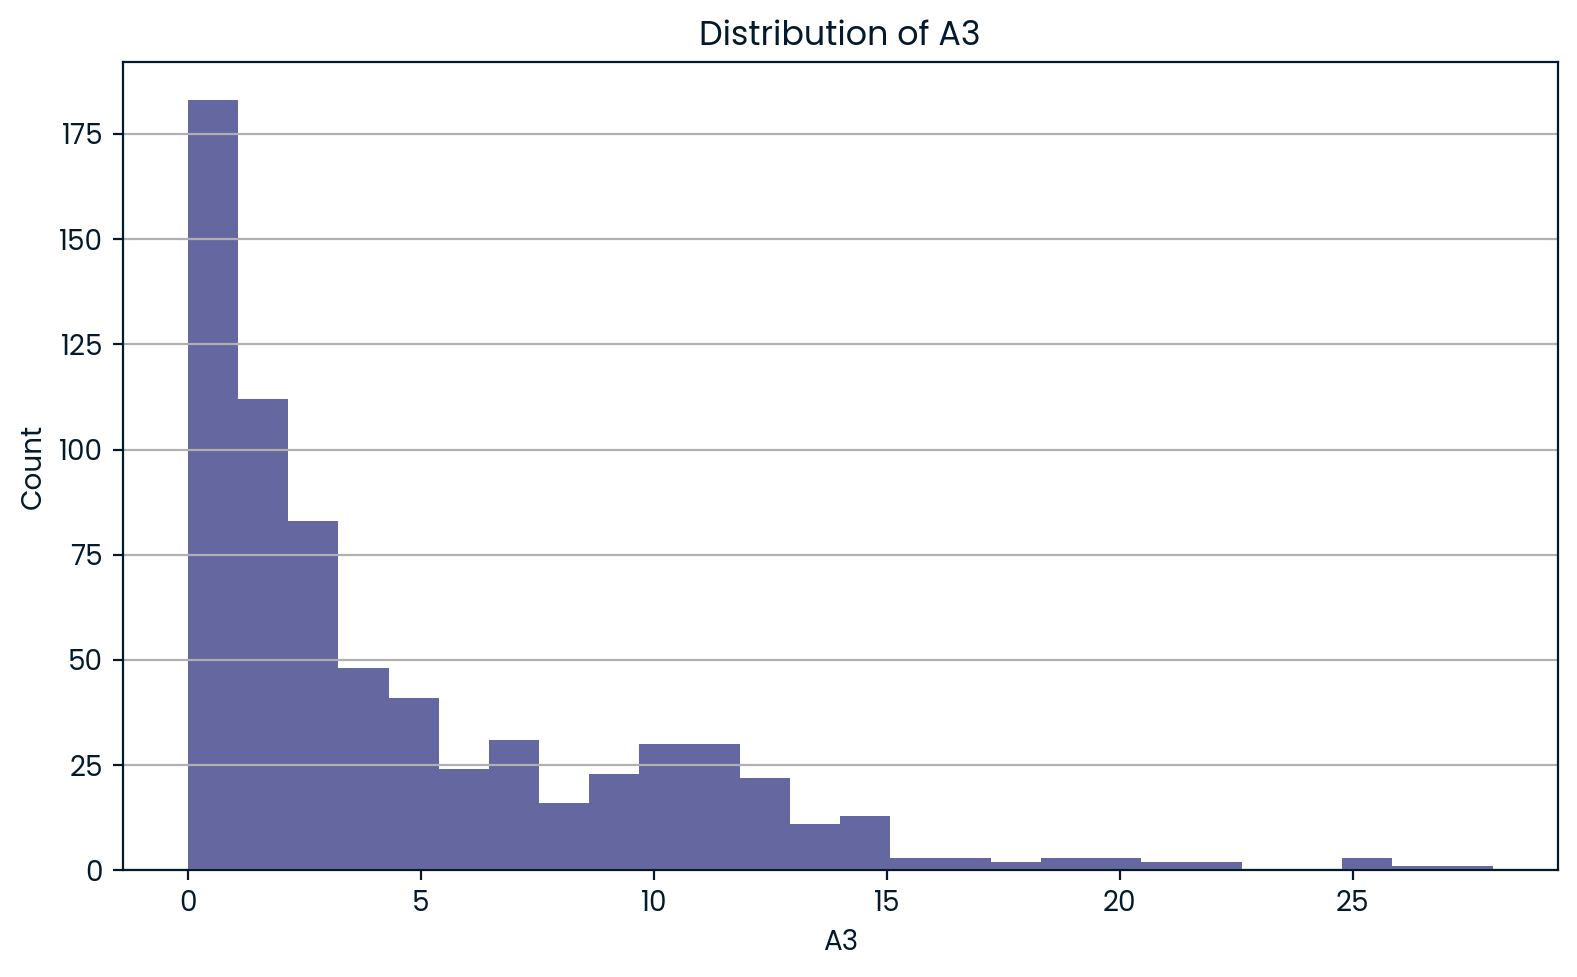

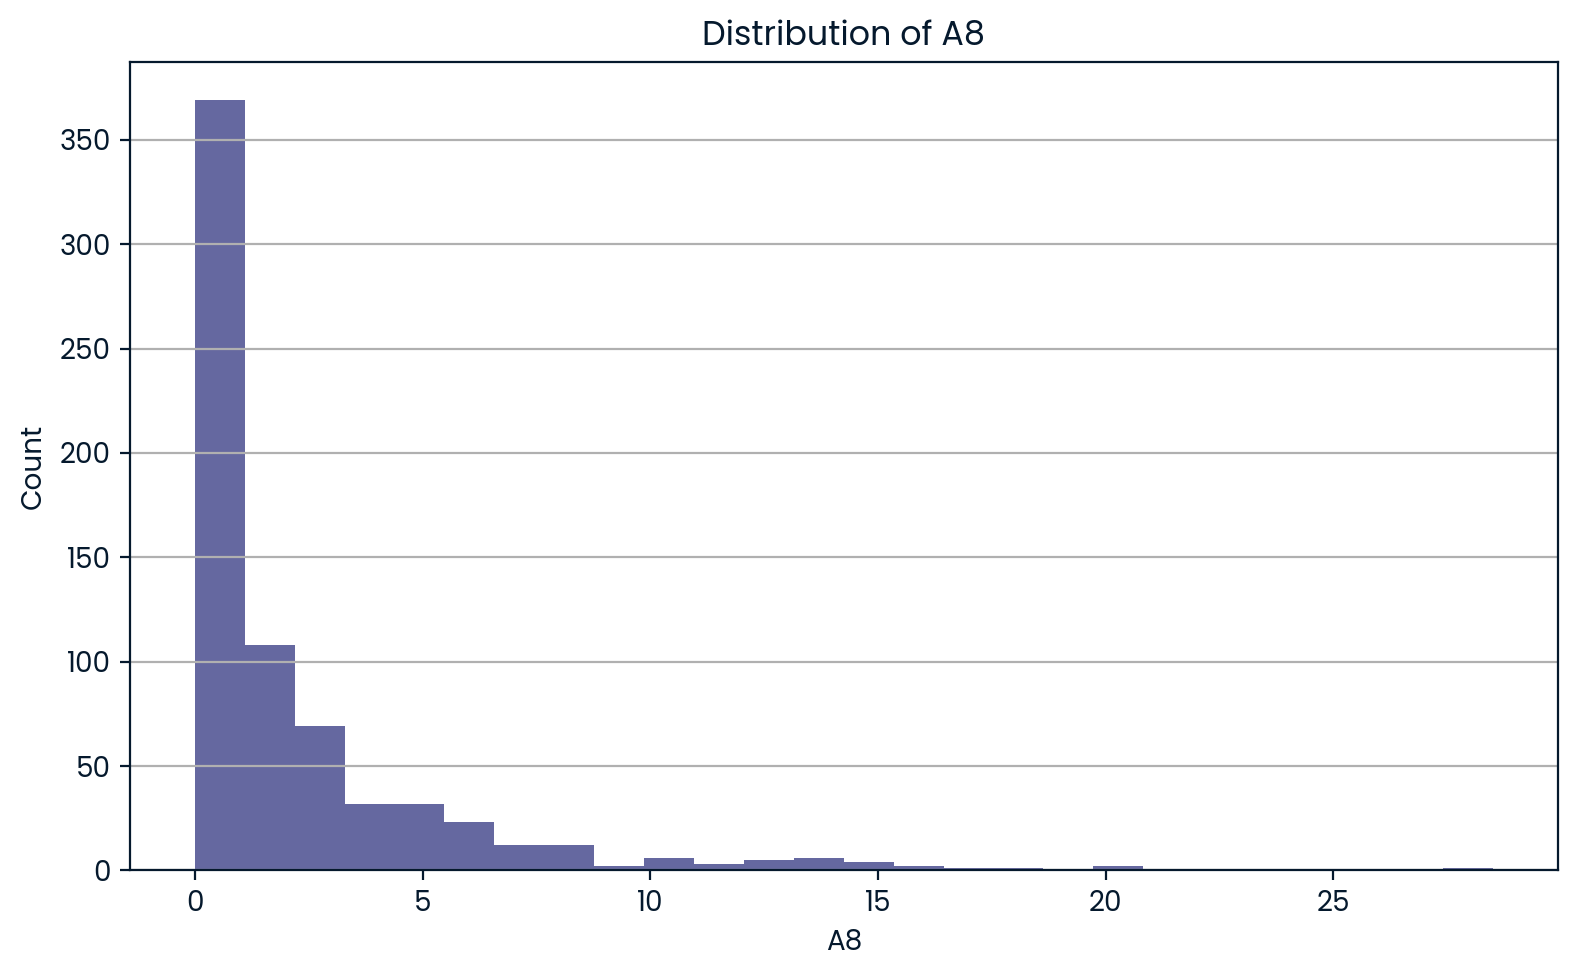

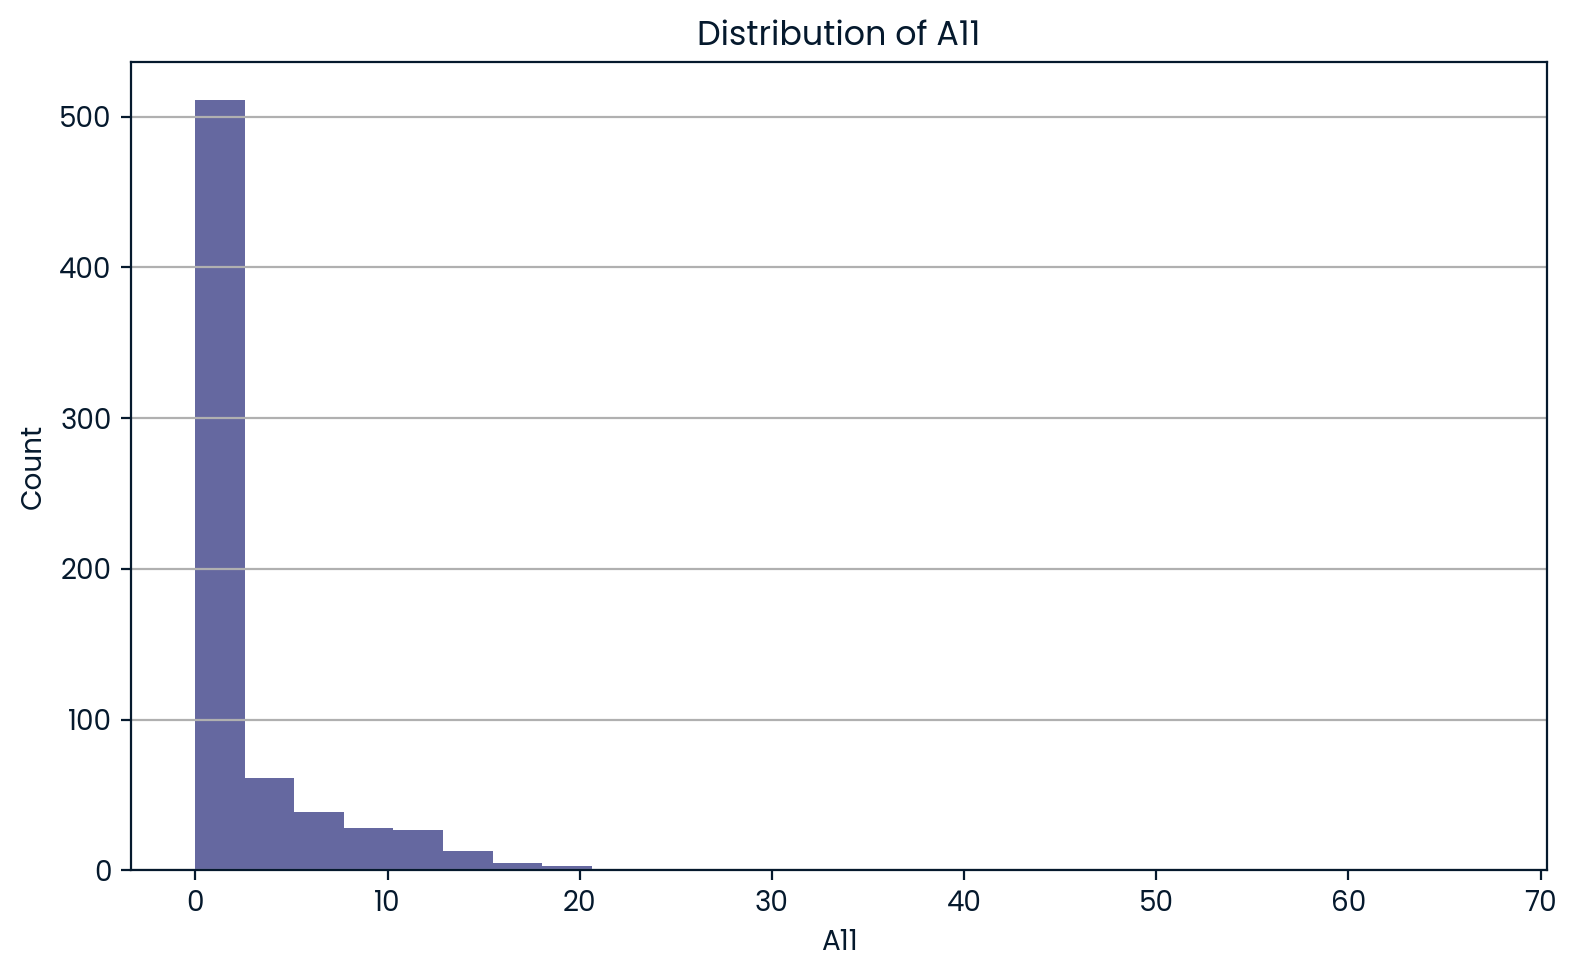

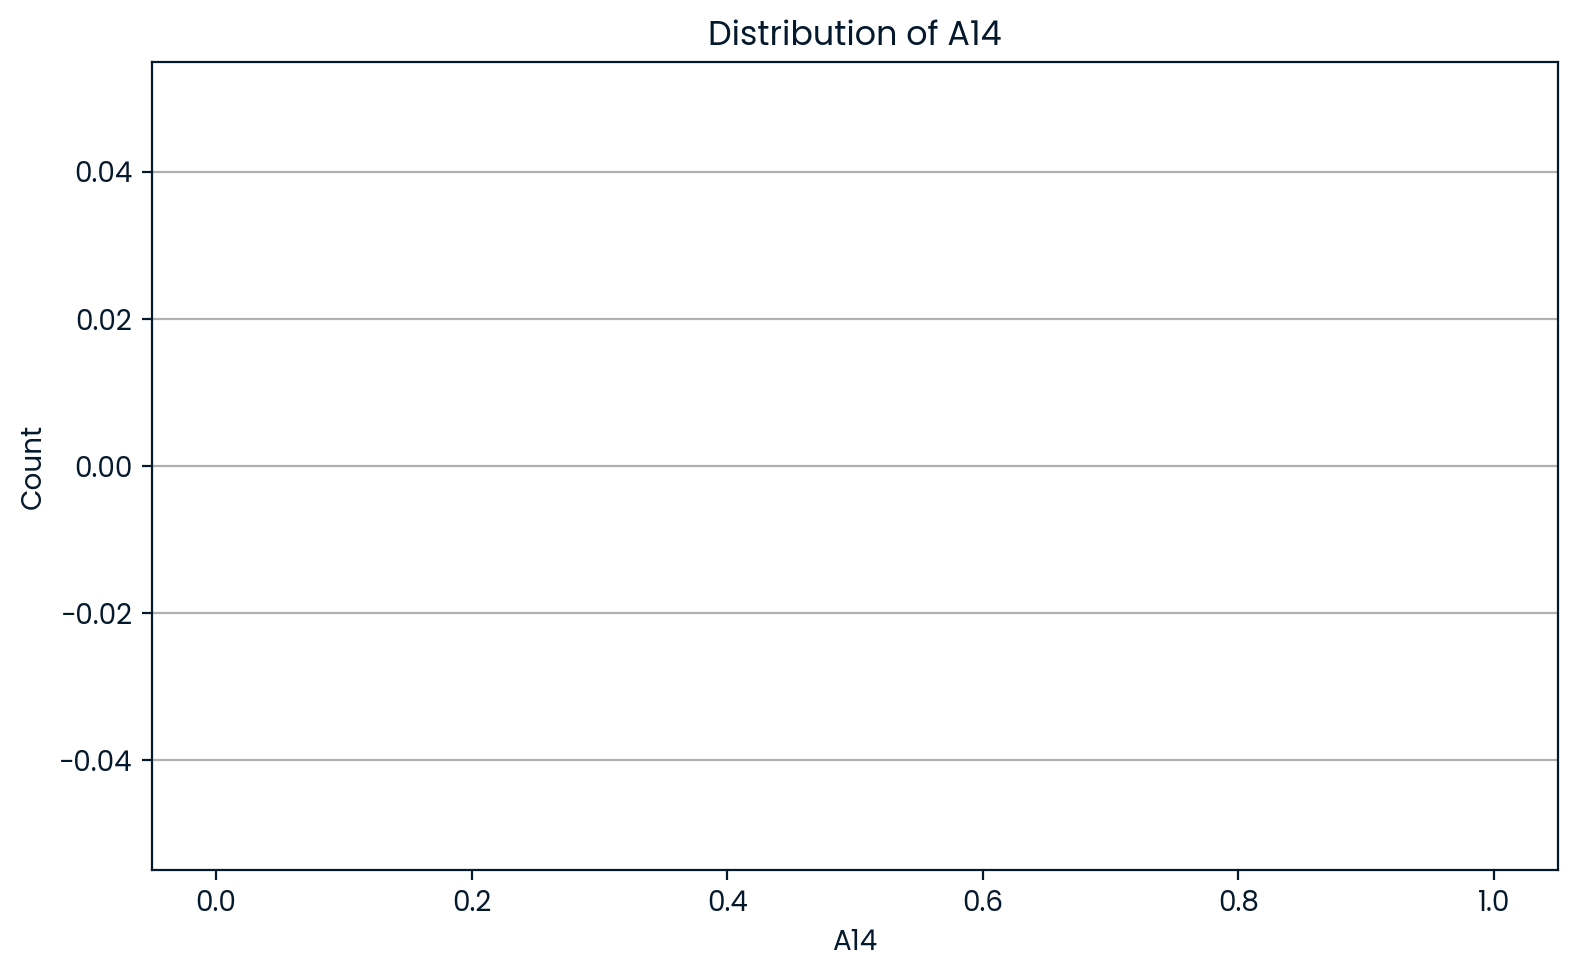

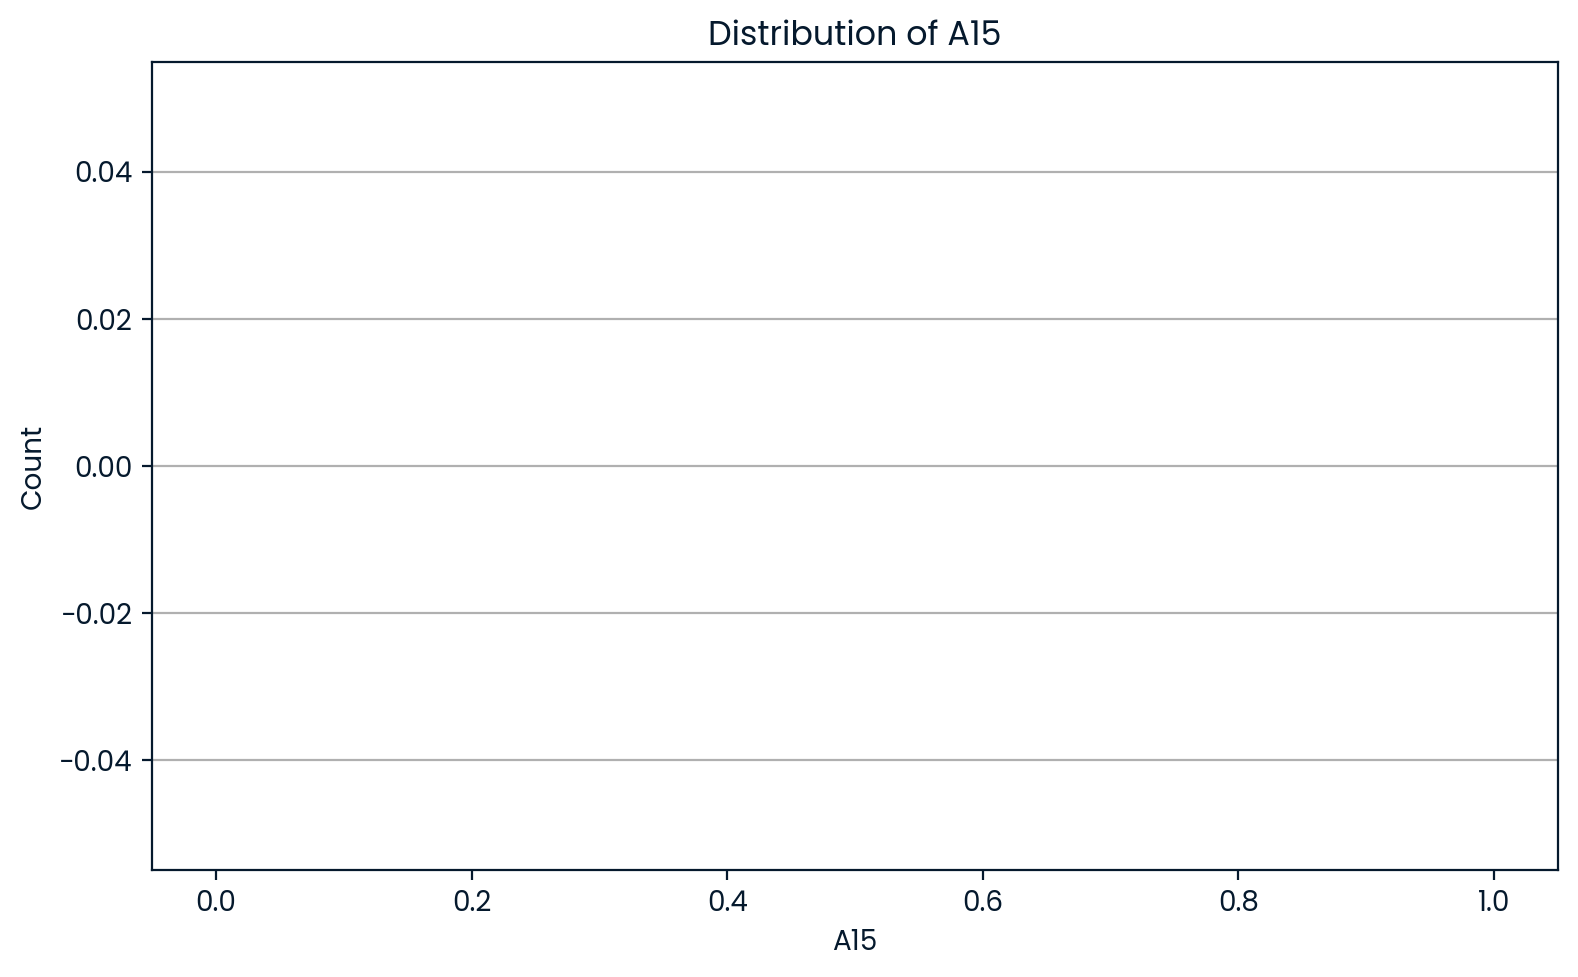

In [8]:
for c in num_cols:
    if c in df.columns:
        plt.figure(figsize=(8, 5))
        vals = df[c].dropna().values
        bins = max(10, int(np.sqrt(len(vals)))) if len(vals) else 10
        plt.hist(vals, bins=bins)
        _finalize(f"Distribution of {c}", xlabel=c, ylabel="Count",
                  save_as=f"figures/dist_{c}.png")

## Numeric correlation heatmap

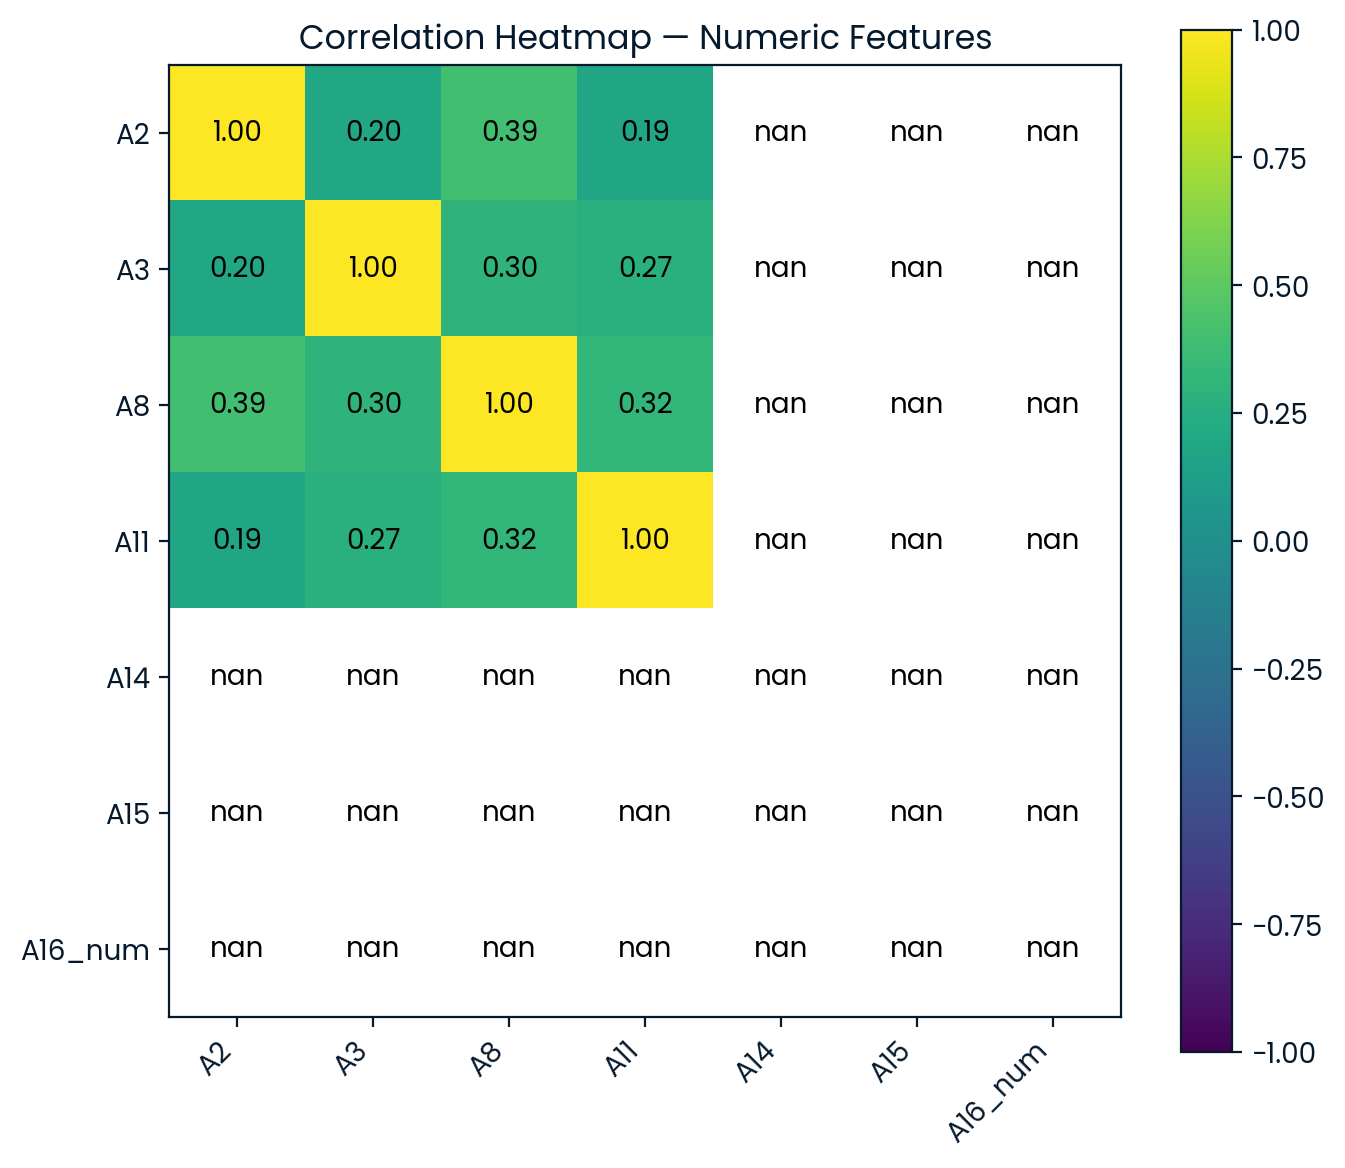

✅ Visuals generated. Check the 'figures/' folder for saved PNGs.


In [14]:
heat_cols = [c for c in num_cols if c in df.columns]
if y is not None:
    heat_cols = heat_cols + ["A16_num"]
    df["A16_num"] = y

if heat_cols:
    cmat = df[heat_cols].corr()
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(cmat, vmin=-1, vmax=1)
    ax.set_xticks(np.arange(len(heat_cols))); ax.set_yticks(np.arange(len(heat_cols)))
    ax.set_xticklabels(heat_cols, rotation=45, ha="right"); ax.set_yticklabels(heat_cols)
    for i in range(len(heat_cols)):
        for j in range(len(heat_cols)):
            ax.text(j, i, f"{cmat.iloc[i, j]:.2f}", ha="center", va="center", color="black")
    ax.set_title("Correlation Heatmap — Numeric Features")
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.savefig("figures/heatmap_numeric.png", dpi=200)
    plt.show()

print("✅ Visuals generated. Check the 'figures/' folder for saved PNGs.")